In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import time
import json

from src import dataloader
from models import transformers, engine, configs

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Check if there is GPU(s): {torch.cuda.is_available()}")

Check if there is GPU(s): True


In [ ]:
Exp_name  = 'Ex_1D_S'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, configs.get_train_hyperparameter_config, Exp_name)
model  = transformers.Transformer1D(configs.SparkMET_1D_config())
#model  = nn.DataParallel(model)
model.to(device)
loss_func = torch.nn.NLLLoss() 
optimizer = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name)

### 1D 

In [3]:
Exp_name = 'Ex_1D_All'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, 
                                                                                                 configs.get_train_hyperparameter_config, 
                                                                                                 Exp_name)
model     = transformers.Transformer1d(configs.SparkMET_1D_config()).to(device)
loss_func = torch.nn.NLLLoss() 
optimizer = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name)

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


AssertionError: 

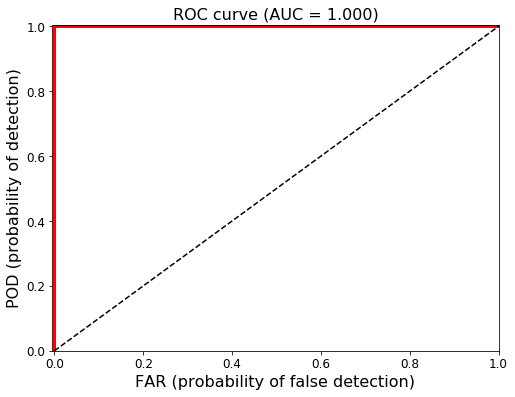

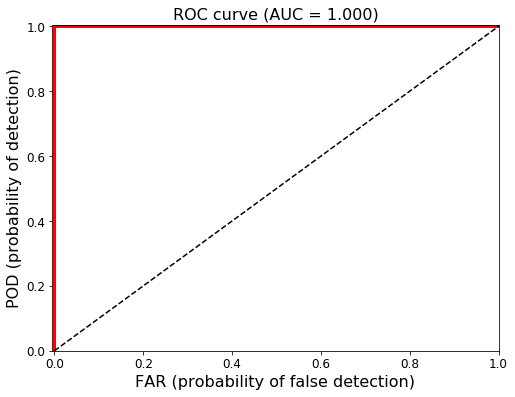

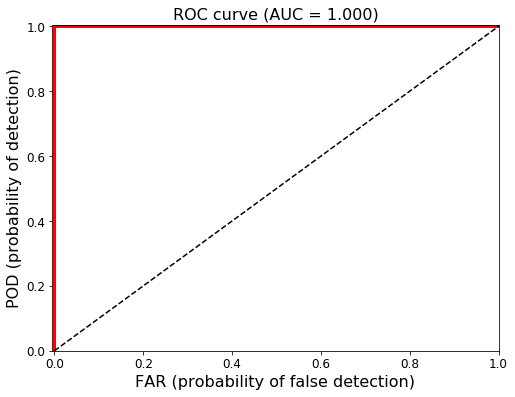

In [6]:
list_output = engine.predict(model, 
                            data_loader_training, 
                             data_loader_validate, 
                             data_loader_testing, 
                             Exp_name = Exp_name,)

### 2D 

In [11]:
data_config_dict      = configs.data_config_dict,
model_config_dict     = configs.SparkMET_2D_config(), 
training_config_dict  = configs.get_train_hyperparameter_config,
Exp_name              = 'test_2D'

In [17]:
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, configs.get_train_hyperparameter_config, Exp_name)

#================================ Summary of Dataset ==================#
number of training samples:   52 | number of training fog cases:   7
number of validation samples: 52 | number of validation fog cases: 7
number of test samples:       52 | number of test fog cases:       7
#======================================================================#


In [13]:
model      = transformers.VisionTransformer(configs.SparkMET_2D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

Epoch 001: | Train Loss: 0.6783 | Val Loss: 0.3359 | Time(s): 12.307
Best model Saved! Val Loss: 0.3359
count: 0
Epoch 002: | Train Loss: 0.3396 | Val Loss: 0.2787 | Time(s): 11.960
Best model Saved! Val Loss: 0.2787
count: 0
Epoch 003: | Train Loss: 0.2793 | Val Loss: 0.2412 | Time(s): 12.195
Best model Saved! Val Loss: 0.2412
count: 0
Epoch 004: | Train Loss: 0.2455 | Val Loss: 0.2313 | Time(s): 12.412
Best model Saved! Val Loss: 0.2313
count: 0
Epoch 005: | Train Loss: 0.2247 | Val Loss: 0.2253 | Time(s): 12.486
Best model Saved! Val Loss: 0.2253
count: 0
Epoch 006: | Train Loss: 0.1793 | Val Loss: 0.2172 | Time(s): 12.370
Best model Saved! Val Loss: 0.2172
count: 0
Epoch 007: | Train Loss: 0.1898 | Val Loss: 0.2113 | Time(s): 12.086
Best model Saved! Val Loss: 0.2113
count: 0
Epoch 008: | Train Loss: 0.2064 | Val Loss: 0.2059 | Time(s): 13.380
Best model Saved! Val Loss: 0.2059
count: 0
Epoch 009: | Train Loss: 0.2390 | Val Loss: 0.2076 | Time(s): 13.394
Model is not saved! Current

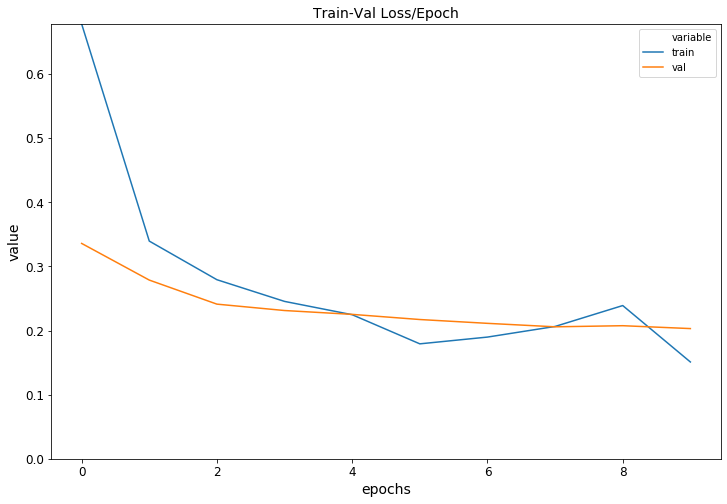

In [15]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name)

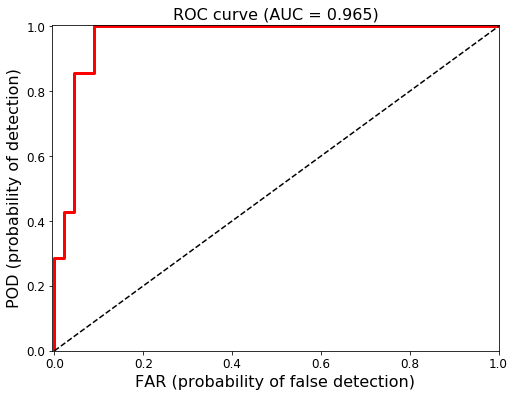

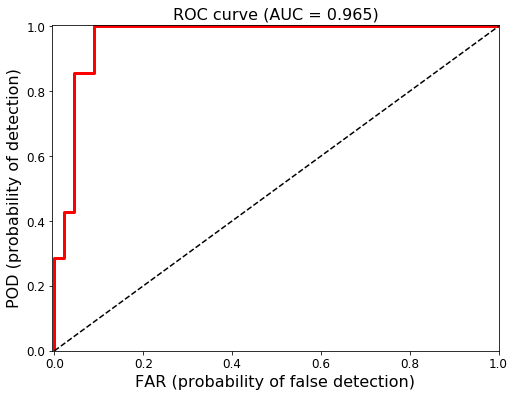

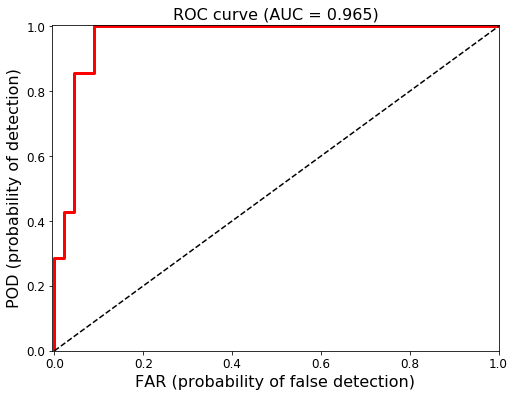

In [16]:
list_output = engine.predict(model, 
                            data_loader_training, 
                             data_loader_validate, 
                             data_loader_testing, 
                             Exp_name = Exp_name,)

### 3D 

In [4]:
data_config_dict      = configs.data_config_dict,
model_config_dict     = configs.SparkMET_3D_config(), 
training_config_dict  = configs.get_train_hyperparameter_config,
Exp_name              = 'test_3D'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, configs.get_train_hyperparameter_config, Exp_name)

#================================ Summary of Dataset ==================#
number of training samples:   52 | number of training fog cases:   7
number of validation samples: 52 | number of validation fog cases: 7
number of test samples:       52 | number of test fog cases:       7
#======================================================================#


In [5]:
model      = transformers.VisionTransformer(configs.SparkMET_3D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

In [ ]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name)

### 4D